# Is there any anomaly in our incoming connections? We look at 1353 records of cybersecurity threats with Machine Learning, in order to predict future security breaches into our systems

![image of cybersecurity](https://www.westgatech.edu/wp-content/uploads/2017/12/2.1.11.4-Cybersecurity-769x352.jpg)

##### The phishing problem is considered a vital issue in the technology industry, especially e-banking and e-commerce taking the number of online transactions involving payments.

We have identified different features related to legitimate and phishy websites and collected 1353 different websites from difference sources.Phishing websites were collected from Phishtank data archive (www.phishtank.com), which is a free community site where users can submit, verify, track and share phishing data. The legitimate websites were collected from Yahoo and starting point directories using a web script developed in PHP. The PHP script was plugged with a browser and we collected 548 legitimate websites out of 1353 websites. There is 702 phishing URLs, and 103 suspicious URLs.

When a website is considered SUSPICIOUS that means it can be either phishy or legitimate, meaning the website held some legit and phishy features. 

### Given the right data, we could accurately predict suspicious messages/connections/phishing attempts ahead of an event occurring - a task which would have been nearly impossible by manually reviewing the data and using traditional statistical methods.

In [1]:
#We start our study by importing the required libraries and graphic interfaces
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#we open the file, build the dataframe and have a look at the records
from scipy.io import arff

df = pd.read_csv('PhishingData.csv')
df.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


In [37]:
df[' Result'].value_counts()

-1    702
 1    548
 0    103
Name:  Result, dtype: int64

# According to our data, the result is contained in the " Result" column, and indicates with "-1" a confirmed phishing website, with "1" a clean website, and with 0 a suspicious website

In [4]:
#and explore the dataset further
df.describe()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,0.237990,-0.258684,0.327421,-0.223208,-0.025129,0.000000,-0.053215,0.219512,0.114560,-0.113821
std,0.916389,0.679072,0.822193,0.799682,0.936262,0.806776,0.762552,0.975970,0.318608,0.954773
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.shape

(1353, 10)

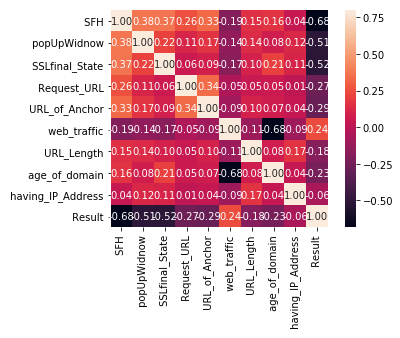

In [6]:
#Open graph modules to build corr matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

corrmat = df.corr()
sns.heatmap(corrmat, vmax = .8, square = True, annot = True, fmt = '.2f')
plt.show()

## Predicting the future from past information

# Using the neighbors algorithm from KNeighborsClassifier

In [7]:
#import appropriate machine learning packages to work with the data

from sklearn import preprocessing, neighbors, model_selection
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [38]:
#we implement the predictive model
#We exclude from X the " Result" column and include it in the y as the only one contaitning the data we need

X = np.array(df.drop([' Result'], 1))
y = np.array(df[' Result'])

In [9]:
#we implement train_test_split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

#instantiate the classifier
clf = neighbors.KNeighborsClassifier(leaf_size = 10)

#fit the data to the model
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [10]:
accuracy = clf.score(X_test, y_test)
accuracy

0.8634686346863468

In [11]:
#now we make a loop to try different values for "leaf_size" parameter
lf_range = list(range(1,10))
lf_scores = []
for lf in lf_range:
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)
    clf = neighbors.KNeighborsClassifier(leaf_size = lf)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    lf_scores.append(accuracy.mean())
    print(lf, accuracy)   


1 0.8966789667896679
2 0.8413284132841329
3 0.8671586715867159
4 0.8819188191881919
5 0.8671586715867159
6 0.8671586715867159
7 0.8339483394833949
8 0.8413284132841329
9 0.9003690036900369


8


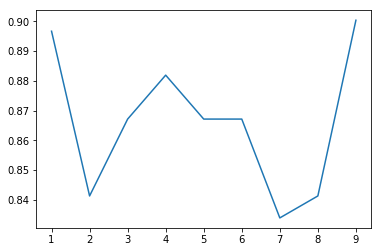

In [12]:
#which index has the max score?
print(lf_scores.index(max(lf_scores)))

#...and we plot results
plt.plot(lf_range, lf_scores)


In [13]:
#set up train test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

#instantiate the classifier
clf = neighbors.KNeighborsClassifier(leaf_size = 6)

#fit the data to the model
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
accuracy

0.8671586715867159

# In search of better accuracy, we apply a different model to the data, this time we use a KNN model

In [14]:
knn = KNeighborsClassifier()
scores = cross_val_score(knn, X, y, cv = 10, scoring = 'accuracy')
scores

scores.max()

0.8955223880597015

In [15]:
#however, to gauge the precision of our model in out-of-sample data, it's better to calculate the man
scores.mean()

0.8699727550169575

In [16]:
#Now we search for an optimal value of K for KNN, trying with a different number of neighbors
k_range = list(range(1, 10))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, y, cv = 10, scoring = 'accuracy')
    k_scores.append(scores.mean())
print(scores)

[0.86131387 0.83941606 0.83823529 0.88888889 0.85185185 0.87407407
 0.8962963  0.85185185 0.8880597  0.87313433]


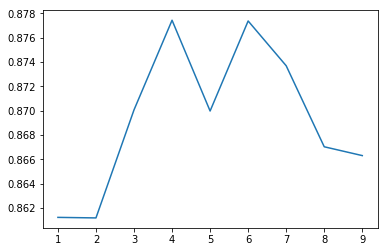

In [17]:
plt.plot(k_range, k_scores)


In [18]:
#This is the max value achieved with KNN, varying the number of neighbors
np.amax(scores)

0.8962962962962963

In [19]:
np.mean(scores)

0.8663122213938654

#### Testing the model by feeding data from an imaginary company

In [25]:
example_data = np.array([[-1,-1,1,-1,-1,1,0,-1,0]])
example_data = example_data.reshape(len(example_data), -1)
result = clf.predict(example_data)
print('According to our model, the result is of this particular set of data introduced is', result)

According to our model, the result is of this particular set of data introduced is [1]


# Now we use a Linear Regression model and compare the first 4 results with the results in our dataset

In [26]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 4)
reg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
pred = reg.predict(X_test)

In [28]:
#Now we compare the prediction for the first 4 predicted values with the actual values on the test table
print(pred[0], pred[1], pred[2], pred[3])
print(y_test)

0.8827247246252363 -0.7587573022553613 -0.7197391223199583 0.12853749753113744
[ 1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1
 -1  1 -1  1  1  1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1
 -1  1  1 -1  1  1 -1  1  0  1 -1  1 -1  1 -1 -1  1 -1  1 -1  1  1  1 -1
 -1  0 -1  1  1 -1  1 -1 -1  0 -1 -1 -1  1 -1  1  1  1  1 -1  1  1 -1  0
  1  1 -1 -1  1 -1  1  1  1  1 -1 -1 -1 -1  1  1 -1  0  1  1 -1 -1  1 -1
  1 -1 -1 -1  1  1 -1  1  1  1  1  1  1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1
 -1 -1  1  0 -1  0 -1  1 -1 -1  1  1  0 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1
 -1  1  1  1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1  0 -1 -1  1  1  1  1  1
 -1 -1  1 -1 -1 -1  0 -1  1 -1 -1 -1  1 -1 -1  1 -1  1  1  1 -1  0  1 -1
  1 -1 -1  0 -1 -1 -1  1  1  1  1 -1  1  1  1  1  1 -1  1 -1  1  1 -1 -1
  1 -1 -1 -1 -1 -1  1  1 -1  1  1  1  1 -1 -1 -1  1  0  1 -1  0 -1 -1 -1
  1 -1 -1  1  1 -1  1]


# Now we use a Logistic Regression model and find out its score with default parameters

In [30]:
from sklearn.linear_model import LogisticRegression
#instantiate the model (using the default parameters)
logreg = LogisticRegression()

#fit the model with data
logreg.fit(X,y)

#predict the response values for the observations in X
logreg.predict(X)

#store the predicted values
y_pred = logreg.predict(X)

#we check how many predictions were generated
len(y_pred)

#compute classification accuracy for the logistic regression model
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

0.835920177383592


# Now we use a Decision Tree model

In [31]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 5)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [32]:
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
score

0.8708487084870848

# Now we use a Random Forest model with some random parameters

In [33]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 30, max_depth = 50, random_state = 15)
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=15, verbose=0, warm_start=False)

In [34]:
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
score

0.8966789667896679

# Now we use a SVM model 

In [35]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
score

0.9003690036900369